In [ ]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import time
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/final_data.csv', index_col=0)   #Change Path to your Drive Directory accordingly.
data = data.drop(['address'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data=data.replace('white','White')
data=data.replace('paduaCryptoWall','CryptoWall')
data=data.replace('montrealCryptoLocker','CryptoLocker')
data=data.replace('princetonCerber','Cerber')
data=data.replace('princetonLocky','Locky')
data=data.replace('montrealCryptXXX','CryptXXX')
data=data.replace('montrealNoobCrypt','NoobCrypt')
data=data.replace('montrealDMALockerv3','DMA Lockerv3')
data=data.replace('montrealDMALocker','DMA Locker')
data=data.replace('montrealSamSam','SamSam')
data=data.replace('montrealCryptoTorLocker2015','CryptoTorLocker2015')
data=data.replace('montrealGlobeImposter','GlobeImposter')
data=data.replace('montrealGlobev3','Globev3')
data=data.replace('montrealGlobe','Globe')
data=data.replace('montrealWannaCry','WannaCry')
data=data.replace('montrealRazy','Razy')
data=data.replace('montrealAPT','APT')
data=data.replace('paduaKeRanger','KeRanger')
data=data.replace('montrealFlyper','Flyper')
data=data.replace('montrealXTPLocker','XTP Locker')
data=data.replace('montrealVenusLocker','Venus Locker')
data=data.replace('montrealCryptConsole','CryptConsole')
data=data.replace('montrealXLockerv5.0','XLockerv5')
data=data.replace('montrealEDA2','EDA2')
data=data.replace('montrealJigSaw','Montreal - JigSaw')
data=data.replace('paduaJigsaw','Padua - Jigsaw')
data=data.replace('montrealXLocker','XLocker')
data=data.replace('montrealSam','Sam')
data=data.replace('montrealComradeCircle','Comrade Circle')

In [ ]:
data = data[(data.label != 'XLocker') & (data.label != 'Comrade Circle') & (data.label != 'Sam')]
print(data)

        year  day  length    weight  ...  looped  neighbors        income   label
0       2017   11      18  0.008333  ...       0          2  1.000500e+08  Cerber
1       2016  132      44  0.000244  ...       0          1  1.000000e+08   Locky
2       2016  246       0  1.000000  ...       0          2  2.000000e+08  Cerber
3       2016  322      72  0.003906  ...       0          2  7.120000e+07  Cerber
4       2016  238     144  0.072848  ...       0          1  2.000000e+08   Locky
...      ...  ...     ...       ...  ...     ...        ...           ...     ...
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09   White
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09   White
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08   White
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09   White
315199  2018  330       6  1.000000  ...       0          2  2.397816e+09   White

[315194 rows x 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc={'figure.figsize':(20.7,20.7)})
corrMatrix = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix', fontsize = 25)
ax = sns.heatmap(cm_df, annot=True,fmt='.1g',annot_kws={"size":10},vmin=corrMatrix.values.min(), vmax=corrMatrix.values.max(),cbar_kws={"shrink": 1}, center=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)
#plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Correlation Matrix.png',dpi=700)
plt.show()

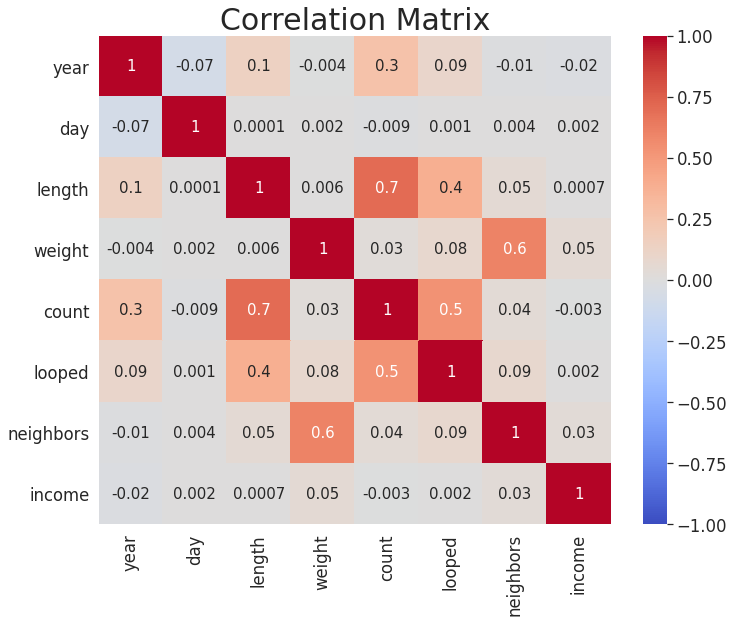

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10.7,9)})
corrMatrix = data.corr()
sns.set(font_scale=1.5)
sns.heatmap(corrMatrix, annot=True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm',annot_kws={"size":15})
plt.title('Correlation Matrix', fontsize = 30)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Correlation Matrix.png',dpi=700)
plt.show()

In [ ]:
print('Value Counts:\n',data['label'].value_counts())
print('Total labels: ',len(data['label'].unique()))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
facet = sns.FacetGrid(data, hue='label',height=5,aspect=3,palette='seismic')
facet.map(plt.hist,'count',bins=10,alpha=0.6)
#facet.set(xlim=(0,data.length.max()))
facet.set_xticklabels(fontsize=15)
facet.set_yticklabels(fontsize=15)
facet.set_xlabels('Count Property of Target Variable',fontsize=15)
facet.set_ylabels('#Instances',fontsize=15)
facet.add_legend()

Log Transformations [Run only once :)]

In [ ]:
import numpy as np
eps = 0.001
data['income'] = np.log(data.pop('income')+eps)
data['weight'] = np.log(data.pop('weight')+eps)
data['count'] = np.log(data.pop('count')+eps)
data['looped'] = np.log(data.pop('looped')+eps)
data['neighbors'] = np.log(data.pop('neighbors')+eps)
data['length'] = np.log(data.pop('length')+eps)
data['day'] = np.log(data.pop('day')+eps)

print(data['length'].min())
print(data['length'].max())
print(data['count'].min())
print(data['count'].max())
print(data.looped.min())
print(data.looped.max())
print(data.neighbors.min())
print(data.neighbors.max())
print(data.income.min())
print(data.income.max())
print(data.weight.min())
print(data.weight.max())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
facet = sns.FacetGrid(data, hue='label',height=5,aspect=3,palette='seismic')
facet.map(plt.hist,'count',bins=10,alpha=0.6)
#facet.set(xlim=(0,data.length.max()))
facet.set_xticklabels(fontsize=15)
facet.set_yticklabels(fontsize=15)
facet.set_xlabels('Count Property of Target Variable',fontsize=15)
facet.set_ylabels('#Instances',fontsize=15)
facet.add_legend()

In [ ]:
data.length.max()

4.969820243996333

In [ ]:
data.columns

Index(['year', 'label', 'income', 'weight', 'count', 'looped', 'neighbors',
       'length', 'day'],
      dtype='object')

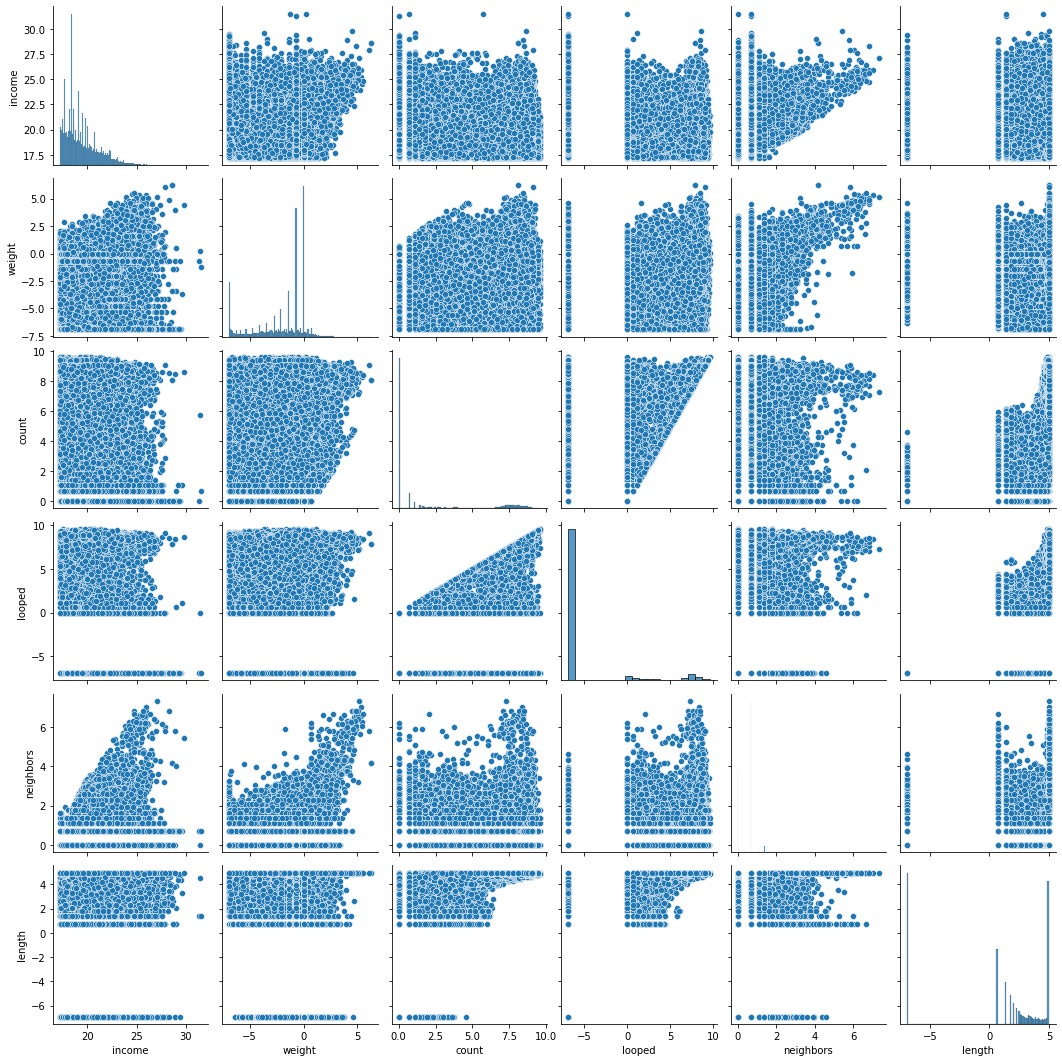

In [ ]:
feats = ['label', 'income', 'weight', 'count', 'looped', 'neighbors','length']
#sns.pairplot(data[feats],height=2.5,hue="label")
#sns.pairplot(data[feats],height=2.5,kind="kde")
sns.pairplot(data[feats],height=2.5)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].unique()

array([ 1, 15,  4,  3,  6, 22,  8,  5, 20, 10, 17,  7, 11,  9, 14, 21, 25,
       18, 13, 16, 24, 19,  2, 12,  0, 23])

In [ ]:
le.classes_

array(['APT', 'Cerber', 'CryptConsole', 'CryptXXX', 'CryptoLocker',
       'CryptoTorLocker2015', 'CryptoWall', 'DMA Locker', 'DMA Lockerv3',
       'EDA2', 'Flyper', 'Globe', 'GlobeImposter', 'Globev3', 'KeRanger',
       'Locky', 'Montreal - JigSaw', 'NoobCrypt', 'Padua - Jigsaw',
       'Razy', 'SamSam', 'Venus Locker', 'WannaCry', 'White', 'XLockerv5',
       'XTP Locker'], dtype=object)

In [ ]:
X = data.loc[:, data.columns != 'label']
y = data['label']

In [ ]:
print(X)
print(y)

        year  day  length    weight  count  looped  neighbors        income
0       2017   11      18  0.008333      1       0          2  1.000500e+08
1       2016  132      44  0.000244      1       0          1  1.000000e+08
2       2016  246       0  1.000000      1       0          2  2.000000e+08
3       2016  322      72  0.003906      1       0          2  7.120000e+07
4       2016  238     144  0.072848    456       0          1  2.000000e+08
...      ...  ...     ...       ...    ...     ...        ...           ...
315195  2018  330       0  0.111111      1       0          2  2.503180e+09
315196  2018  330       0  0.500000      1       0          2  1.000000e+09
315197  2018  330       6  0.020092      2       0          1  3.000000e+08
315198  2018  330       0  0.333333      1       0          2  1.372746e+09
315199  2018  330       6  1.000000      1       0          2  2.397816e+09

[315194 rows x 8 columns]
0          1
1         15
2          1
3          1
4        

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2020,stratify = y)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252155
63039
252155
63039


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate = 0.1, n_estimators = 1000,tree_method='gpu_hist', n_jobs=-1)
# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train, verbose=2)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
model = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 250, n_jobs=-1)
# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train)

Calculating Relative Feature Importances

In [ ]:
feat_imp = ['income', 'weight', 'count', 'looped', 'neighbors', 'length']

Mean Absolute Error :  0.8853725471533496
Accuracy:  0.9494598581830296
Recall:  0.9494598581830296
Precision:  0.9507922663584312
F1-score:  0.9497530525771894
Runtime of the program is 434.42889642715454


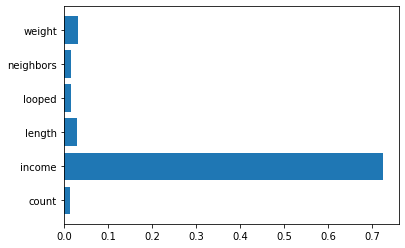

In [ ]:
start = time.time()
import xgboost as xgb
import matplotlib.pyplot as plt

model_xgb_1 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 1500, tree_method = 'gpu_hist')
model_xgb_1.fit(X_train, y_train)
y_pred_xgb_1 = model_xgb_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_xgb_1)
acc = accuracy_score(y_test, y_pred_xgb_1)
f1_score = f1_score(y_test, y_pred_xgb_1,average='weighted')
recall = recall_score(y_test, y_pred_xgb_1,average='weighted')
precision = precision_score(y_test, y_pred_xgb_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_xgb_1 = list(model_xgb_1.feature_importances_)
feat_imp_xgb_1 = dict(zip(feat_imp, importance_xgb_1))
feat_imp_xgb_1 = collections.OrderedDict(sorted(feat_imp_xgb_1.items()))
keys_xgb_1 = feat_imp_xgb_1.keys()
values_xgb_1 = feat_imp_xgb_1.values()
plt.barh(list(keys_xgb_1), list(values_xgb_1))
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/XGB_Feature_Importance.png')

end = time.time()
print(f"Runtime of the program is {end - start}")

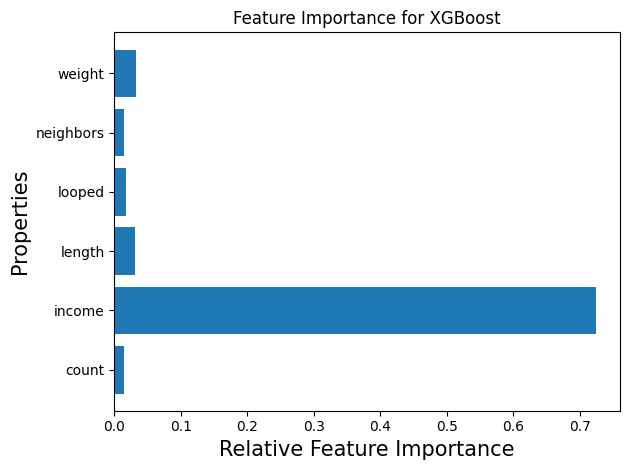

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
inline_rc = dict(mpl.rcParams)
sns.reset_orig
plt.barh(list(keys_xgb_1), list(values_xgb_1))
plt.xlabel('Relative Feature Importance', fontsize = 15)
plt.ylabel('Properties', fontsize = 15)
plt.title('Feature Importance for XGBoost')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/XGB_Feature_Importance.png', dpi=700, edgecolor = 'black',pad_inches = 0)

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, y_pred_xgb_1, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_xgb = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_xgb)

Mean Absolute Error :  0.8545979473024635
Accuracy:  0.9508082298259808
Recall:  0.9508082298259808
Precision:  0.9525790646527832
F1-score:  0.9512333512980066
Runtime of the program is 89.24003601074219


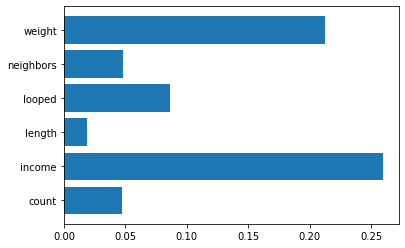

In [ ]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier
model_rf_1 = RandomForestClassifier(n_estimators = 250)
model_rf_1.fit(X_train, y_train)
y_pred_rf_1 = model_rf_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_rf_1)
acc = accuracy_score(y_test, y_pred_rf_1)
f1_score = f1_score(y_test, y_pred_rf_1,average='weighted')
recall = recall_score(y_test, y_pred_rf_1,average='weighted')
precision = precision_score(y_test, y_pred_rf_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_rf_1 = list(model_rf_1.feature_importances_)
feat_imp_rf_1 = dict(zip(feat_imp, importance_rf_1))
feat_imp_rf_1 = collections.OrderedDict(sorted(feat_imp_rf_1.items()))
keys_rf_1 = feat_imp_rf_1.keys()
values_rf_1 = feat_imp_rf_1.values()
plt.barh(list(keys_rf_1), list(values_rf_1))
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/RF_Feature_Importance.png')
end = time.time()
print(f"Runtime of the program is {end - start}")

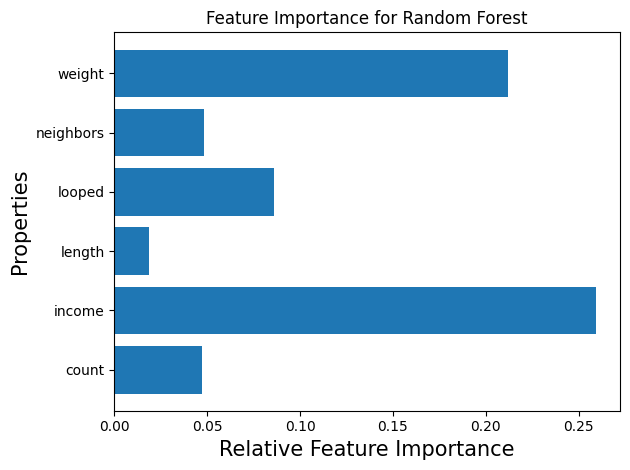

In [ ]:
plt.barh(list(keys_rf_1), list(values_rf_1))
plt.xlabel('Relative Feature Importance', fontsize = 15)
plt.ylabel('Properties', fontsize = 15)
plt.title('Feature Importance for Random Forest')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/RF_Feature_Importance.png', dpi=700, edgecolor = 'black',pad_inches = 0)

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, y_pred_rf_1, target_names=le.classes_, digits = 4, output_dict=True)
classification_metrics_rf = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_rf)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.899613  0.944972  0.921735   3689.000000
CryptConsole          1.000000  1.000000  1.000000      3.000000
CryptXXX              0.968303  0.978306  0.973279    968.000000
CryptoLocker          0.842293  0.887279  0.864201   3726.000000
CryptoTorLocker2015   1.000000  0.818182  0.900000     22.000000
CryptoWall            0.860668  0.957224  0.906381   4956.000000
DMA Locker            0.922078  0.710000  0.802260    100.000000
DMA Lockerv3          0.887097  0.774648  0.827068    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 1.000000  0.846154  0.916667     13.000000
GlobeImposter         1.000000  0.818182  0.900000     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              1.0

Mean Absolute Error :  0.9891337108773933
Accuracy:  0.9419089769825029
Recall:  0.9419089769825029
Precision:  0.9436259732226416
F1-score:  0.9423756025343887
Runtime of the program is 25.110166311264038


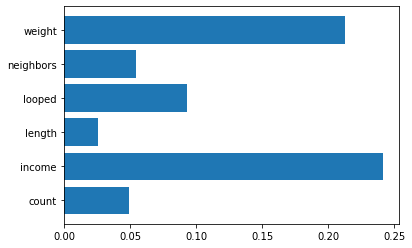

In [ ]:
start = time.time()
from sklearn.ensemble import ExtraTreesClassifier
model_etc_1 = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model_etc_1.fit(X_train, y_train)
y_pred_etc_1 = model_etc_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_etc_1)
acc = accuracy_score(y_test, y_pred_etc_1)
f1_score = f1_score(y_test, y_pred_etc_1,average='weighted')
recall = recall_score(y_test, y_pred_etc_1,average='weighted')
precision = precision_score(y_test, y_pred_etc_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_etc_1 = list(model_etc_1.feature_importances_)
feat_imp_etc_1 = dict(zip(feat_imp, importance_etc_1))
feat_imp_etc_1 = collections.OrderedDict(sorted(feat_imp_etc_1.items()))
keys_etc_1 = feat_imp_etc_1.keys()
values_etc_1 = feat_imp_etc_1.values()
plt.barh(list(keys_etc_1), list(values_etc_1))
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/ET_Feature_Importance.png')
end = time.time()
print(f"Runtime of the program is {end - start}")

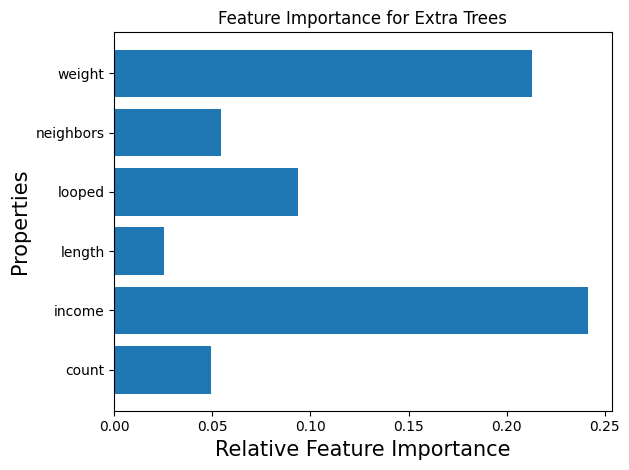

In [ ]:
plt.barh(list(keys_etc_1), list(values_etc_1))
plt.xlabel('Relative Feature Importance', fontsize = 15)
plt.ylabel('Properties', fontsize = 15)
plt.title('Feature Importance for Extra Trees')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/ET_Feature_Importance.png', dpi=700, edgecolor = 'black',pad_inches = 0)

In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, y_pred_etc_1, target_names=le.classes_, digits = 4,output_dict=True)
classification_metrics_etc = pd.DataFrame(classification_metrics).transpose()
print(classification_metrics_etc)

                     precision    recall  f1-score       support
APT                   1.000000  0.500000  0.666667      4.000000
Cerber                0.896952  0.941448  0.918662   3689.000000
CryptConsole          1.000000  1.000000  1.000000      3.000000
CryptXXX              0.957099  0.967975  0.962506    968.000000
CryptoLocker          0.856881  0.878959  0.867780   3726.000000
CryptoTorLocker2015   1.000000  0.818182  0.900000     22.000000
CryptoWall            0.865094  0.947135  0.904257   4956.000000
DMA Locker            0.922078  0.710000  0.802260    100.000000
DMA Lockerv3          0.900000  0.760563  0.824427    142.000000
EDA2                  1.000000  1.000000  1.000000      2.000000
Flyper                1.000000  0.500000  0.666667      4.000000
Globe                 1.000000  0.846154  0.916667     13.000000
GlobeImposter         0.947368  0.818182  0.878049     22.000000
Globev3               1.000000  0.785714  0.880000     14.000000
KeRanger              0.6

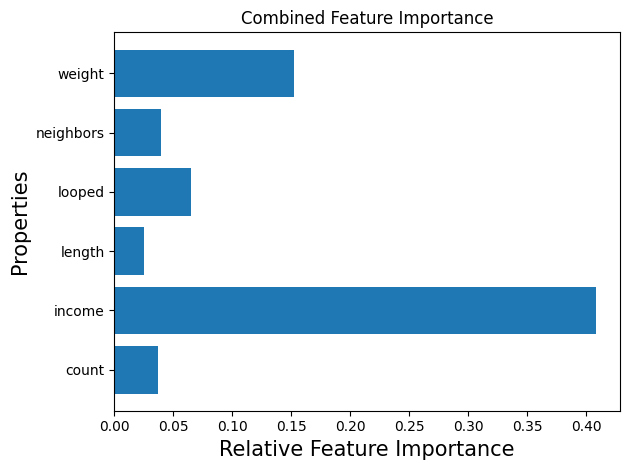

In [ ]:
import numpy as np
feat_imp_1 = np.array(list(values_xgb_1)) + np.array(list(values_rf_1)) + np.array(list(values_etc_1))
relative_feat_imp_1 = feat_imp_1/3
plt.barh(list(keys_xgb_1), list(relative_feat_imp_1))
plt.xlabel('Relative Feature Importance', fontsize = 15)
plt.ylabel('Properties', fontsize = 15)
plt.title('Combined Feature Importance')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Feature_Importance.png',dpi=700, edgecolor = 'black',pad_inches = 0)

In [ ]:
classification_metrics_rf.to_csv('/content/drive/MyDrive/Bitcoin Heist/Metrics/RF Classification Report.csv')
classification_metrics_xgb.to_csv('/content/drive/MyDrive/Bitcoin Heist/Metrics/XGB Classification Report.csv')
classification_metrics_etc.to_csv('/content/drive/MyDrive/Bitcoin Heist/Metrics/ETC Classification Report.csv')

Reload data for EDA

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/Data/final_data.csv', index_col=0)   #Change Path to your Drive Directory accordingly.
data = data.drop(['address'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 

'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].unique()'''

X = data.loc[:, data.columns != 'label']
y = data['label']
#y = data.loc[:, data.columns == 'label']

In [ ]:
print(data)
print(X)
print(y)

In [ ]:
data['label'].value_counts()

In [ ]:
white = data.loc[data['label']=='White']
paduaCryptoWall = data.loc[data['label']=='CryptoWall']
montrealCryptoLocker = data.loc[data['label']=='CryptoLocker']
princetonCerber = data.loc[data['label']=='Cerber']
princetonLocky = data.loc[data['label']=='Locky']
montrealCryptXXX = data.loc[data['label']=='CryptXXX']
montrealNoobCrypt = data.loc[data['label']=='NoobCrypt']
montrealDMALockerv3 = data.loc[data['label']=='DMA Lockerv3']
montrealDMALocker = data.loc[data['label']=='DMA Locker']
montrealSamSam = data.loc[data['label']=='SamSam']
montrealCryptoTorLocker2015 = data.loc[data['label']=='CryptoTorLocker2015']
montrealGlobeImposter = data.loc[data['label']=='GlobeImposter']
montrealGlobev3 = data.loc[data['label']=='Globev3']
montrealGlobe = data.loc[data['label']=='Globe']
montrealWannaCry = data.loc[data['label']=='WannaCry']
montrealRazy = data.loc[data['label']=='Razy']
montrealAPT = data.loc[data['label']=='APT']
paduaKeRanger = data.loc[data['label']=='KeRanger']
montrealFlyper = data.loc[data['label']=='Flyper']
montrealXTPLocker = data.loc[data['label']=='XTP Locker']
montrealVenusLocker = data.loc[data['label']=='Venus Locker']
montrealCryptConsole = data.loc[data['label']=='CryptConsole']
montrealXLockerv5 = data.loc[data['label']=='XLockerv5']
montrealEDA2 = data.loc[data['label']=='EDA2']
montrealJigSaw = data.loc[data['label']=='Montreal - JigSaw']
paduaJigsaw = data.loc[data['label']=='Padua - Jigsaw']
'''montrealXLocker = data.loc[data['label']=='XLocker']
montrealSam = data.loc[data['label']=='Sam']
montrealComradeCircle = data.loc[data['label']=='ComradeCircle']'''

In [ ]:
data['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [ ]:
black = paduaCryptoWall.append([montrealCryptoLocker,princetonCerber,princetonLocky,montrealCryptXXX,montrealNoobCrypt,montrealDMALockerv3,montrealDMALocker,montrealSamSam,montrealCryptoTorLocker2015,montrealGlobeImposter,montrealGlobev3,montrealGlobe,montrealWannaCry,montrealRazy,montrealAPT,paduaKeRanger,montrealFlyper,montrealXTPLocker,montrealVenusLocker,montrealCryptConsole,montrealXLockerv5,montrealEDA2,montrealJigSaw,paduaJigsaw])

In [ ]:
print(len(black['label'].unique()))
print((black['label'].unique()))

25
['paduaCryptoWall' 'montrealCryptoLocker' 'princetonCerber'
 'princetonLocky' 'montrealCryptXXX' 'montrealNoobCrypt'
 'montrealDMALockerv3' 'montrealDMALocker' 'montrealSamSam'
 'montrealCryptoTorLocker2015' 'montrealGlobeImposter' 'montrealGlobev3'
 'montrealGlobe' 'montrealWannaCry' 'montrealRazy' 'montrealAPT'
 'paduaKeRanger' 'montrealFlyper' 'montrealXTPLocker'
 'montrealVenusLocker' 'montrealCryptConsole' 'montrealXLockerv5.0'
 'montrealEDA2' 'montrealJigSaw' 'paduaJigsaw']


In [ ]:
print(white)
print(paduaCryptoWall)
print(montrealCryptoLocker)
print(princetonCerber)
print(princetonLocky)
print(montrealCryptXXX)
print(montrealNoobCrypt)
print(montrealDMALockerv3)
print(montrealDMALocker)
print(montrealSamSam)
print(montrealCryptoTorLocker2015)
print(montrealGlobeImposter)
print(montrealGlobev3)
print(montrealGlobe)
print(montrealWannaCry)
print(montrealRazy)
print(montrealAPT)
print(paduaKeRanger)
print(montrealFlyper)
print(montrealXTPLocker)
print(montrealVenusLocker)
print(montrealCryptConsole)
print(montrealXLockerv5)
print(montrealEDA2)
print(montrealJigSaw)
print(paduaJigsaw)
print(montrealXLocker)
print(montrealSam)
print(montrealComradeCircle)

         year  day  length     weight  ...  looped  neighbors        income  label
41413    2011    1       0   1.000000  ...       0          1  5.000000e+09  white
41414    2011    1       0   1.000000  ...       0          2  5.000000e+09  white
41415    2011    1       0   1.000000  ...       0          2  9.150000e+08  white
41416    2011    1       0   1.000000  ...       0          2  3.402500e+10  white
41417    2011    1       0   1.000000  ...       0          2  1.275100e+10  white
...       ...  ...     ...        ...  ...     ...        ...           ...    ...
2916692  2018  330       0   0.111111  ...       0          1  1.255809e+09  white
2916693  2018  330       0   1.000000  ...       0          1  4.409699e+07  white
2916694  2018  330       2  12.000000  ...       6         35  2.398267e+09  white
2916695  2018  330       0   0.500000  ...       0          1  1.780427e+08  white
2916696  2018  330     144   0.073972  ...       0          2  1.123500e+08  white

[28

'print(paduaCryptoWall)\nprint(montrealCryptoLocker)\nprint(princetonCerber)\nprint(princetonLocky)\nprint(montrealCryptXXX)\nprint(montrealNoobCrypt)\nprint(montrealDMALockerv3)\nprint(montrealDMALocker)\nprint(montrealSamSam)\nprint(montrealCryptoTorLocker2015)\nprint(montrealGlobeImposter)\nprint(montrealGlobev3)\nprint(montrealGlobe)\nprint(montrealWannaCry)\nprint(montrealRazy)\nprint(montrealAPT)\nprint(paduaKeRanger)\nprint(montrealFlyper)\nprint(montrealXTPLocker)\nprint(montrealVenusLocker)\nprint(montrealCryptConsole)\nprint(montrealXLockerv5)\nprint(montrealEDA2)\nprint(montrealJigSaw)\nprint(paduaJigsaw)\nprint(montrealXLocker)\nprint(montrealSam)\nprint(montrealComradeCircle)'

In [ ]:
'''white=white.replace('white','White')
paduaCryptoWall=paduaCryptoWall.replace('paduaCryptoWall','CryptoWall')
montrealCryptoLocker=montrealCryptoLocker.replace('montrealCryptoLocker','CryptoLocker')
princetonCerber=princetonCerber.replace('princetonCerber','Cerber')
princetonLocky=princetonLocky.replace('princetonLocky','Locky')
montrealCryptXXX=montrealCryptXXX.replace('montrealCryptXXX','CryptXXX')
montrealNoobCrypt=montrealNoobCrypt.replace('montrealNoobCrypt','NoobCrypt')
montrealDMALockerv3=montrealDMALockerv3.replace('montrealDMALockerv3','DMA Lockerv3')
montrealDMALocker=montrealDMALocker.replace('montrealDMALocker','DMA Locker')
montrealSamSam=montrealSamSam.replace('montrealSamSam','SamSam')
montrealCryptoTorLocker2015=montrealCryptoTorLocker2015.replace('montrealCryptoTorLocker2015','CryptoTorLocker2015')
montrealGlobeImposter=montrealGlobeImposter.replace('montrealGlobeImposter','GlobeImposter')
montrealGlobev3=montrealGlobev3.replace('montrealGlobev3','Globev3')
montrealGlobe=montrealGlobe.replace('montrealGlobe','Globe')
montrealWannaCry=montrealWannaCry.replace('montrealWannaCry','WannaCry')
montrealRazy=montrealRazy.replace('montrealRazy','Razy')
montrealAPT=montrealAPT.replace('montrealAPT','APT')
paduaKeRanger=paduaKeRanger.replace('paduaKeRanger','KeRanger')
montrealFlyper=montrealFlyper.replace('montrealFlyper','Flyper')
montrealXTPLocker=montrealXTPLocker.replace('montrealXTPLocker','XTP Locker')
montrealVenusLocker=montrealVenusLocker.replace('montrealVenusLocker','Venus Locker')
montrealCryptConsole=montrealCryptConsole.replace('montrealCryptConsole','CryptConsole')
montrealXLockerv5=montrealXLockerv5.replace('montrealXLockerv5.0','XLockerv5')
montrealEDA2=montrealEDA2.replace('montrealEDA2','EDA2')
montrealJigSaw=montrealJigSaw.replace('montrealJigSaw','JigSaw')
paduaJigsaw=paduaJigsaw.replace('paduaJigsaw','Jigsaw')
montrealXLocker=montrealXLocker.replace('montrealXLocker','XLocker')
montrealSam=montrealSam.replace('montrealSam','Sam')
montrealComradeCircle=montrealComradeCircle.replace('montrealComradeCircle','Comrade Circle')'''

In [ ]:
white.to_csv('/content/drive/MyDrive/Bitcoin Heist/white.csv',index=False)
paduaCryptoWall.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaCryptoWall.csv',index=False)
montrealCryptoLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptoLocker.csv',index=False)
princetonCerber.to_csv('/content/drive/MyDrive/Bitcoin Heist/princetonCerber.csv',index=False)
princetonLocky.to_csv('/content/drive/MyDrive/Bitcoin Heist/princetonLocky.csv',index=False)
montrealCryptXXX.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptXXX.csv',index=False)
montrealNoobCrypt.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealNoobCrypt.csv',index=False)
montrealDMALockerv3.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealDMALockerv3.csv',index=False)
montrealDMALocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealDMALocker.csv',index=False)
montrealSamSam.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealSamSam.csv',index=False)
montrealCryptoTorLocker2015.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptoTorLocker2015.csv',index=False)
montrealGlobeImposter.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobeImposter.csv',index=False)
montrealGlobev3.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobev3.csv',index=False)
montrealGlobe.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobe.csv',index=False)
montrealWannaCry.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealWannaCry.csv',index=False)
montrealRazy.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealRazy.csv',index=False)
montrealAPT.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealAPT.csv',index=False)
paduaKeRanger.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaKeRanger.csv',index=False)
montrealFlyper.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealFlyper.csv',index=False)
montrealXTPLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXTPLocker.csv',index=False)
montrealVenusLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealVenusLocker.csv',index=False)
montrealCryptConsole.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptConsole.csv',index=False)
montrealXLockerv5.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXLockerv5.csv',index=False)
montrealEDA2.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealEDA2.csv',index=False)
montrealJigSaw.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealJigSaw.csv',index=False)
paduaJigsaw.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaJigsaw.csv',index=False)
montrealXLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXLocker.csv',index=False)
montrealSam.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealSam.csv',index=False)
montrealComradeCircle.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealComradeCircle.csv',index=False)

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
inline_rc = dict(mpl.rcParams)
sns.reset_orig

<function seaborn.rcmod.reset_orig>

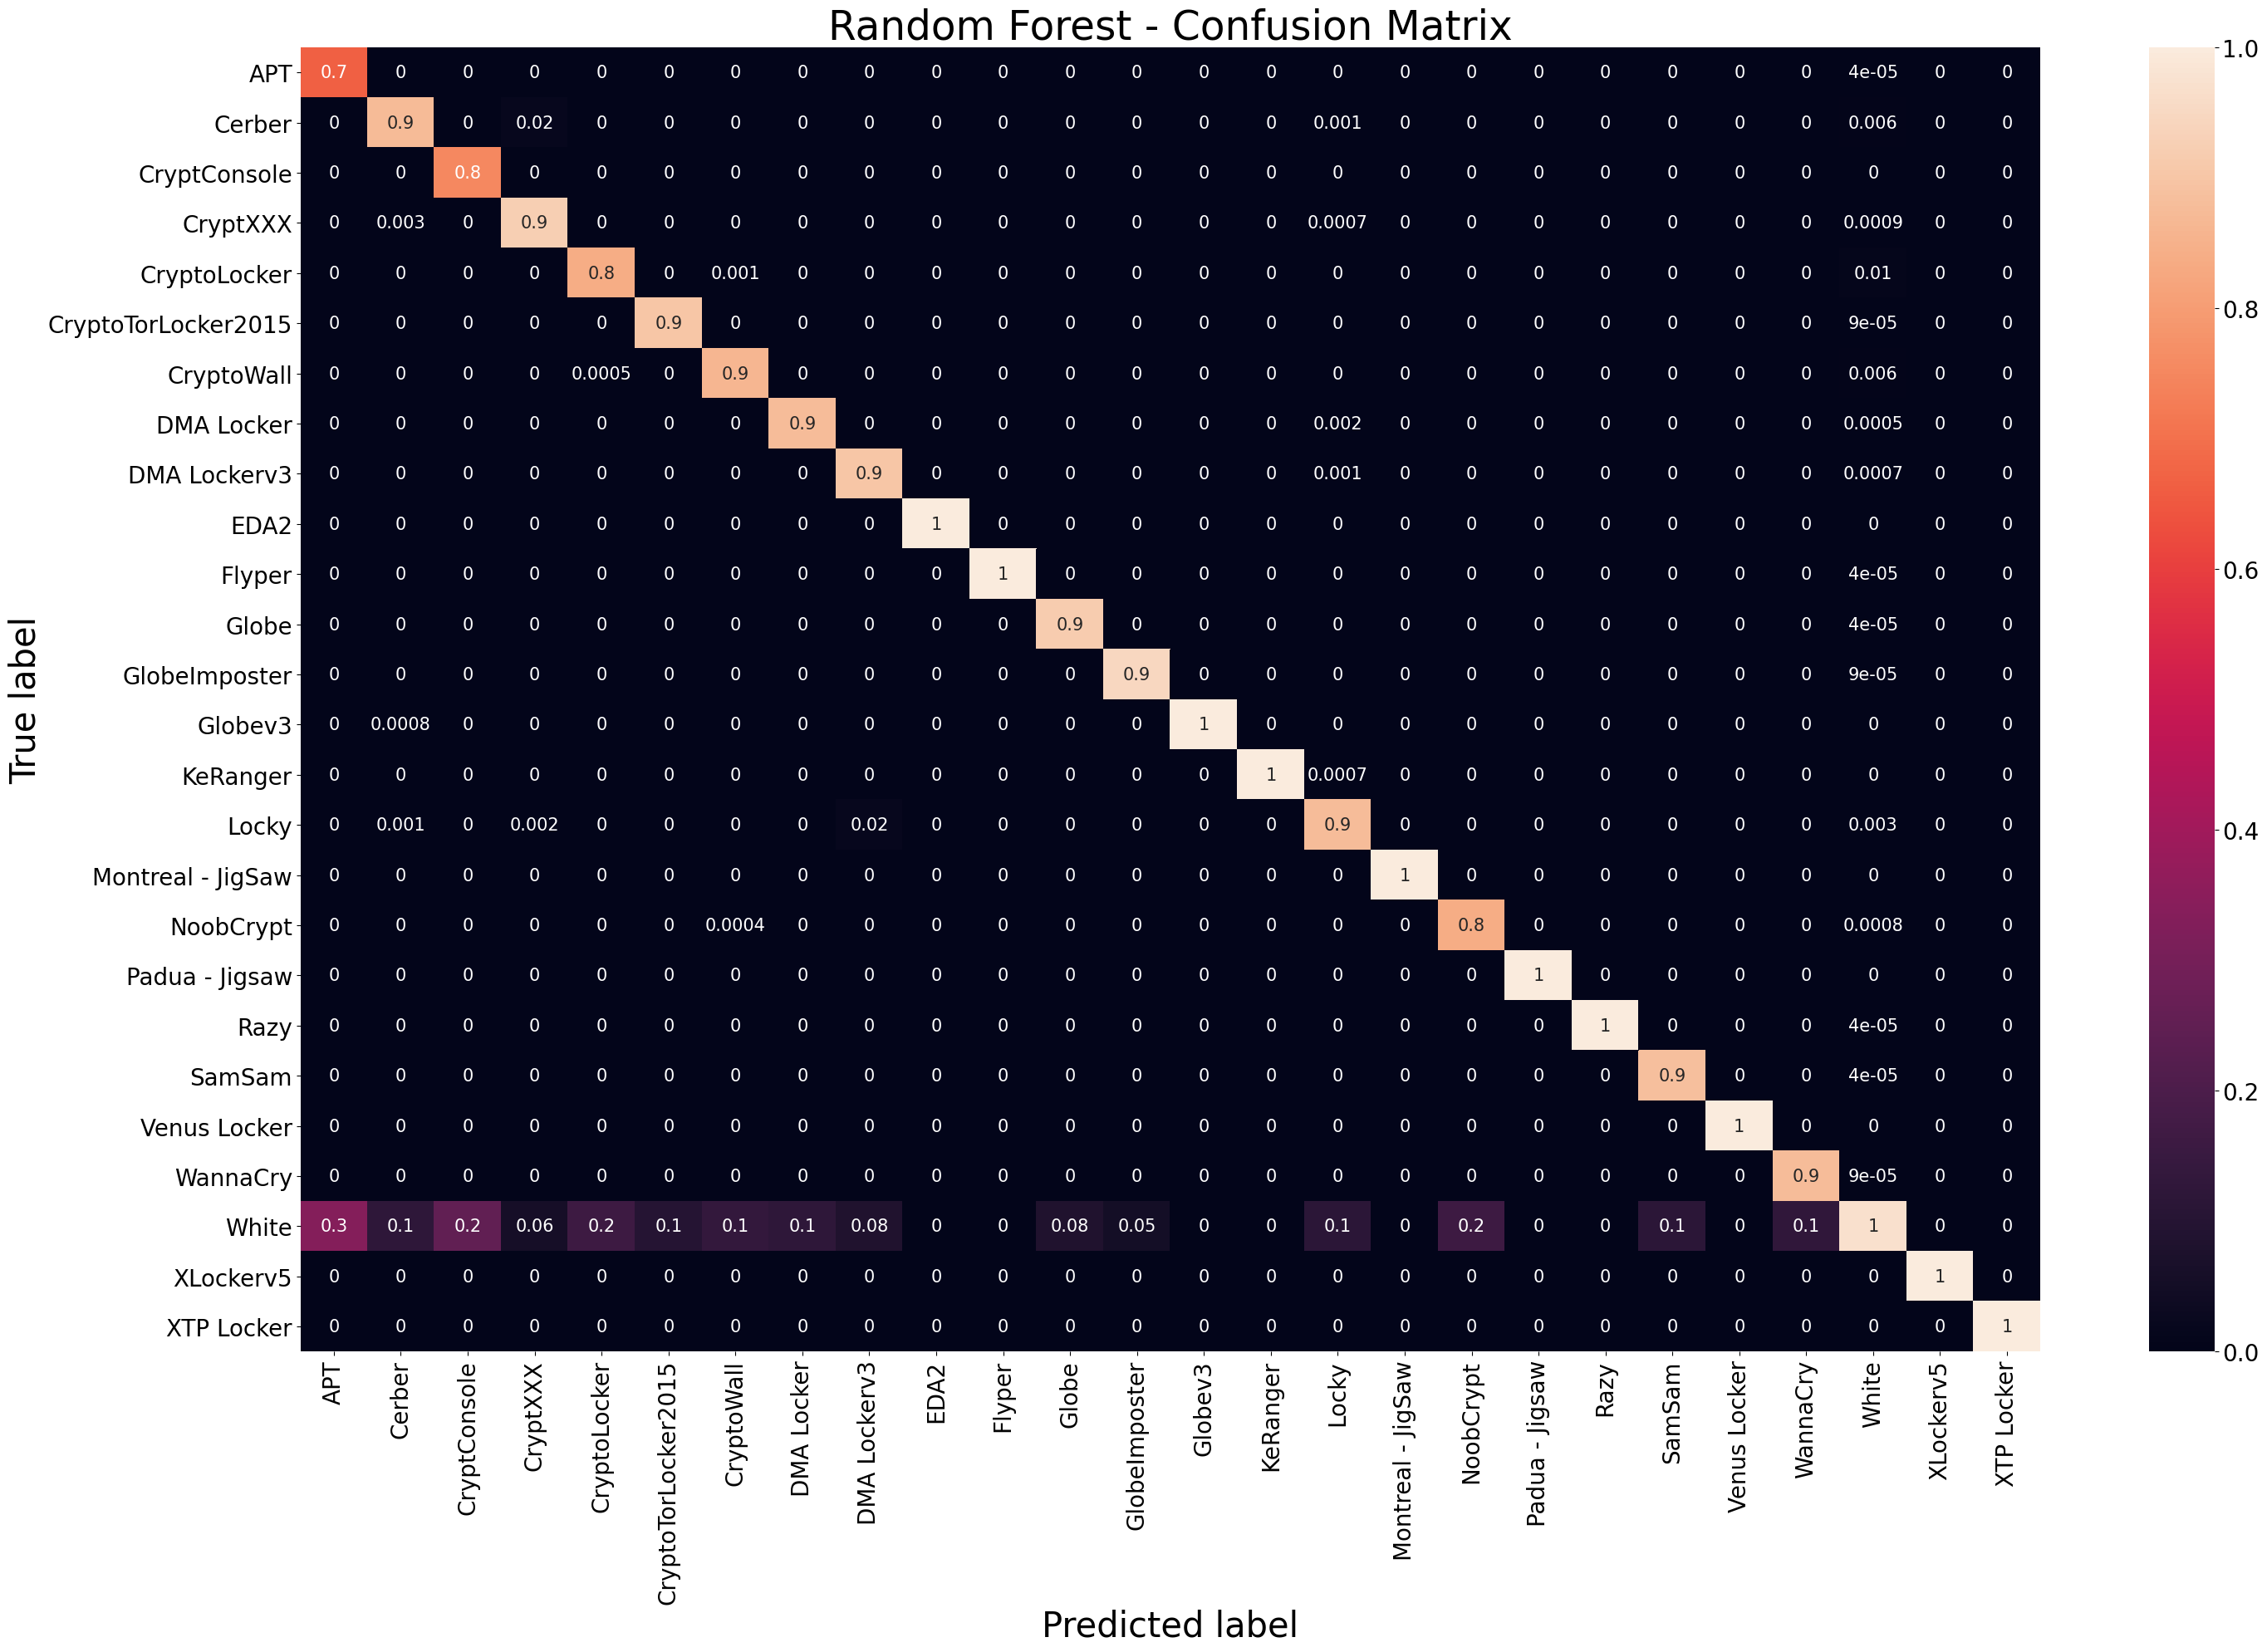

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_etc_1,normalize='pred')

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = le.classes_, 
                     columns = le.classes_)

plt.figure(figsize=(30,20))
ax = sns.heatmap(cm_df, annot=True,fmt='.1g',annot_kws={"size":15},vmin=cm_df.values.min(), vmax=cm_df.values.max(),cbar_kws={"shrink": 1})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('Random Forest - Confusion Matrix'.format(accuracy_score(y_test, y_pred_rf_1)),fontsize=35)
plt.ylabel('True label',fontsize=30)
plt.xlabel('Predicted label',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/ConfusionMatrix.png',dpi=700, edgecolor = 'black',pad_inches = 0)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1=white["neighbors"]                              
y1=white["weight"]                       
x2=black["neighbors"]                              
y2=black["weight"]
'''x3=montrealCryptoLocker["income"]                              
y3=montrealCryptoLocker["count"]'''    
plot1=plt.scatter(y1,x1)
plot2=plt.scatter(y2,x2)
#plot3=plt.scatter(x3,y3)                
plt.title('Count v/s Length', fontsize=18)
plt.xlabel('Length', fontsize=18)
plt.xticks(np.arange(min(y1), max(y1+5),100),fontsize=14)      
plt.ylabel('Count', fontsize=18)
plt.yticks(np.arange(min(x1), max(x1+5),500),fontsize=14)      #Select Max Range for y axis. Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2],labels=['White','Black'], fontsize=18, loc = 'center right')
#plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Count/Cryptowall_Cryptolocker.png')   #Download the plot in colab. Check Files section of colab.
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1=princetonCerber["income"]                              
y1=princetonCerber["count"]                       
x2=princetonLocky["income"]                              
y2=princetonLocky["count"]
x3=montrealCryptXXX["income"]                              
y3=montrealCryptXXX["count"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('Count v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('Count', fontsize=18)
plt.yticks(np.arange(min(y2), max(y2+500),500),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','Locky','CryptXXX'], fontsize=18, loc = 'center right')
plt.savefig('/content/drive/MyDrive/Bitcoin Heist/Plots/Count/Cerber_Locky_CryptXXX.png')                             #Download the plot in colab. Check Files section of colab.
plt.show()